# Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection technique commonly used in machine learning to select the most relevant features from a given dataset. It aims to improve model performance by iteratively removing the least important features and evaluating the model's performance after each removal. The process continues until a predefined number of features is reached {cite:p}`guyon2003introduction,kuhn2019feature,brownlee2020data`.

Let's assume we have:

- Dataset: $X \in \mathbb{R}^{N \times M}$, where $N$ is the number of samples and $M$ is the number of features.
- Target: $y \in \mathbb{R}^{N}$.
- Model: $f(\mathbf{w}, \mathbf{x})$ represents the chosen machine learning model with parameters $\mathbf{w}$.
- Importance scores: $\mathbf{s} \in \mathbb{R}^{M}$ represents the importance scores for each feature.

The steps of RFE are as follows:

1. **Model Training and Importance Scores Calculation**:
   - Train the model $f$ on the entire dataset $X$ to learn the parameters $\mathbf{w}$.
   - Calculate the importance scores for each feature using some method specific to the model. For example, in linear regression, importance scores might be the absolute values of the feature coefficients, while in tree-based models, it could be computed using feature importance scores.

2. **Identify and Remove Feature**:
   - Identify the index $i$ of the feature with the lowest importance score: $i = \arg \min_{j}(\mathbf{s}[j])$.
   - Remove the feature at index $i$ from the dataset $X$ to obtain $X'$, where $X' \in \mathbb{R}^{N \times (M-1)}$.
   - Adjust the importance scores array $\mathbf{s}$ by removing the element at index $i$.

3. **Retrain Model**:
   - Retrain the model $f$ using the modified dataset $X'$ to adapt to the reduced feature set.
   - The updated model $f$ will have updated parameters $\mathbf{w}'$.

4. **Repeat Process**:
   - Repeat steps 1-3 iteratively until you reach the desired number of features to keep or another stopping criterion.

5. **Final Model**:
   - The final model is the one obtained after the iterative process is completed. It's trained on the selected subset of features.

The mathematics in this process primarily involves the operations associated with training the model, calculating importance scores, identifying the minimum importance score, removing features, and updating the model parameters. The specific mathematical equations and expressions will depend on the chosen machine learning model, the method used to calculate importance scores, and the dataset's structure.

`````{admonition} Recursive Feature Elimination (RFE) Algorithm

Refined Explanation of Recursive Feature Elimination (RFE) in Feature Selection:

1. **Input**:
   - **Training Data**: The initial dataset containing feature matrix $X$ (comprising the input features) and target vector $y$ (consisting of corresponding target values).
   - **Machine Learning Estimator**: This refers to the chosen predictive model, such as linear regression or support vector machine, that will be employed for feature selection.

2. **Initialization**:
   - Determine the number of features to retain, denoted as $k$, or decide the level of improvement in model performance you seek to achieve.
   - Initialize the Recursive Feature Elimination (RFE) process with all the available features.

3. **Model Training and Importance Score Calculation**:
   - Train the selected machine learning estimator using the training data $X$ and $y$.
   - Compute feature importance scores, which quantify the significance of each feature in contributing to the model's predictive performance. The approach to obtaining these scores varies based on the type of estimator utilized. For linear models, importance could be inferred from absolute feature coefficients, whereas tree-based models might yield feature importance scores.

4. **Feature Ranking and Elimination**:
   - Identify the feature with the lowest importance score and eliminate it from the current feature set.
   - Update the training data to comprise only the remaining features.
   - Re-train the machine learning estimator using the reduced feature set.

5. **Performance Evaluation**:
   - Assess the performance of the estimator by employing either a validation set or cross-validation methodology with the newly formed, reduced feature set.
   - Monitor the chosen performance metric (e.g., accuracy, mean squared error) attained using the current subset of features.

6. **Stopping Criterion**:
   - Check if the predetermined number of features ($k$) has been reached or if the desired level of performance enhancement has been attained. If either condition is met, terminate the process. If not, proceed to step 3.

7. **Final Model**:
   - The ultimate selection of features consists of those that remain after the completion of the RFE process.
   - Train the machine learning estimator using the complete training dataset, but only with the features that were selected through RFE. This final model incorporates the most relevant features while potentially disregarding less significant ones.

Recursive Feature Elimination is an iterative procedure that systematically identifies and excludes the least important features. By iteratively repeating the steps and continually updating the feature set, RFE aims to enhance the model's performance and potentially improve its generalization capability.

`````

<font color='Blue'><b>Example:</b></font> In this Example, we utilize the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset to explain the application of Recursive Feature Elimination (RFE).

In [1]:
import pandas as pd
from sklearn import datasets

# Load the breast cancer dataset
data = datasets.load_breast_cancer()

# Create a Pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the DataFrame
display(df)

# Print dataset description
print(data['DESCR'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Upon inspection, the dataset comprises 569 instances and 32 attributes. The primary objective is to construct a classification model capable of accurately classifying the **Diagnosis** based on the remaining attributes. Before delving into the model creation, let's commence by generating a count plot that visualizes the distribution of the **Diagnosis** attribute.

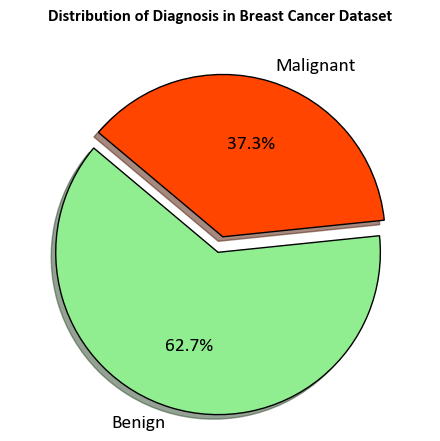

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('../mystyle.mplstyle')

diagnosis_labels = np.array([data.target_names[i].title() for i in data.target])
unique_labels, label_counts = np.unique(diagnosis_labels, return_counts=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4.5, 4.5))
colors = ['LightGreen', 'OrangeRed']
explode = (0.1, 0)  # Explode the first slice

# Create the pie chart
ax.pie(label_counts, labels=unique_labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode,
       shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1},
       textprops={'fontsize': 14})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of Diagnosis in Breast Cancer Dataset', weight = 'bold', y=1.1)
plt.tight_layout()

`````{admonition} Note
:class: warning


In the context of breast cancer:

- **Benign Breast Conditions:** These are non-cancerous changes in breast tissue. While they might cause discomfort or be palpable as lumps, they do not carry the risk of spreading to other parts of the body. Examples include fibroadenomas and cysts.

- **Malignant Breast Conditions (Breast Cancer):** Breast cancer occurs when cells in the breast tissue start to grow uncontrollably, forming a malignant tumor. If left untreated, these cancer cells can invade surrounding tissues and potentially metastasize to other organs, leading to life-threatening consequences.

In summary, "benign" refers to non-cancerous conditions with limited potential to spread, while "malignant" refers to cancerous conditions with the potential to invade surrounding tissues and spread to other parts of the body.

`````

[**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) is a modified version of the k-fold cross-validation technique. It generates stratified folds, meaning that each fold retains a similar proportion of samples from each target class as present in the entire dataset. This ensures that the distribution of target classes remains consistent across the folds, enhancing the reliability of model evaluation, especially when dealing with imbalanced datasets.

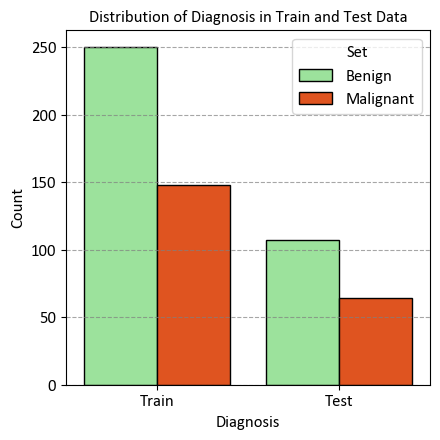

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedShuffleSplit

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Create StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
_ = sss.get_n_splits(X, y)

# Split the data into train and test sets
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Create a DataFrame to store train and test data labels
df_temp = pd.DataFrame()
diagnosis_labels = np.array([data.target_names[i].title() for i in y])
temp = pd.DataFrame({'Diagnosis': diagnosis_labels[train_index], 'Set': len(train_index) * ['Train']})
df_temp = pd.concat([df_temp, temp], ignore_index=True)
temp = pd.DataFrame({'Diagnosis': diagnosis_labels[test_index], 'Set': len(test_index) * ['Test']})
df_temp = pd.concat([df_temp, temp], ignore_index=True)

# Set custom color palette
custom_palette = {'Benign': 'LightGreen', 'Malignant': 'OrangeRed'}
# Create figure and axes
fig, ax = plt.subplots(figsize=(4.5, 4.5))

# Create count plot with hue using custom palette
_ = sns.countplot(data=df_temp, x="Set", hue="Diagnosis", palette=custom_palette, ax=ax, ec = 'k')

# Set title, labels, and legend
_ = ax.set(title="Distribution of Diagnosis in Train and Test Data",
           xlabel="Diagnosis", ylabel="Count")
_ = ax.legend(title='Set', fontsize=12, title_fontsize=12)

# Add grid lines
_ = ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve spacing
plt.tight_layout()

## Visualizing Feature Importance and RFE Rankings

Visualizing the importance of features and their rankings can provide valuable insights into understanding the significance of different features in a dataset. In this section, we'll demonstrate how to create two subplots: one displaying feature importances and another showing Recursive Feature Elimination (RFE) rankings using a RandomForestClassifier.

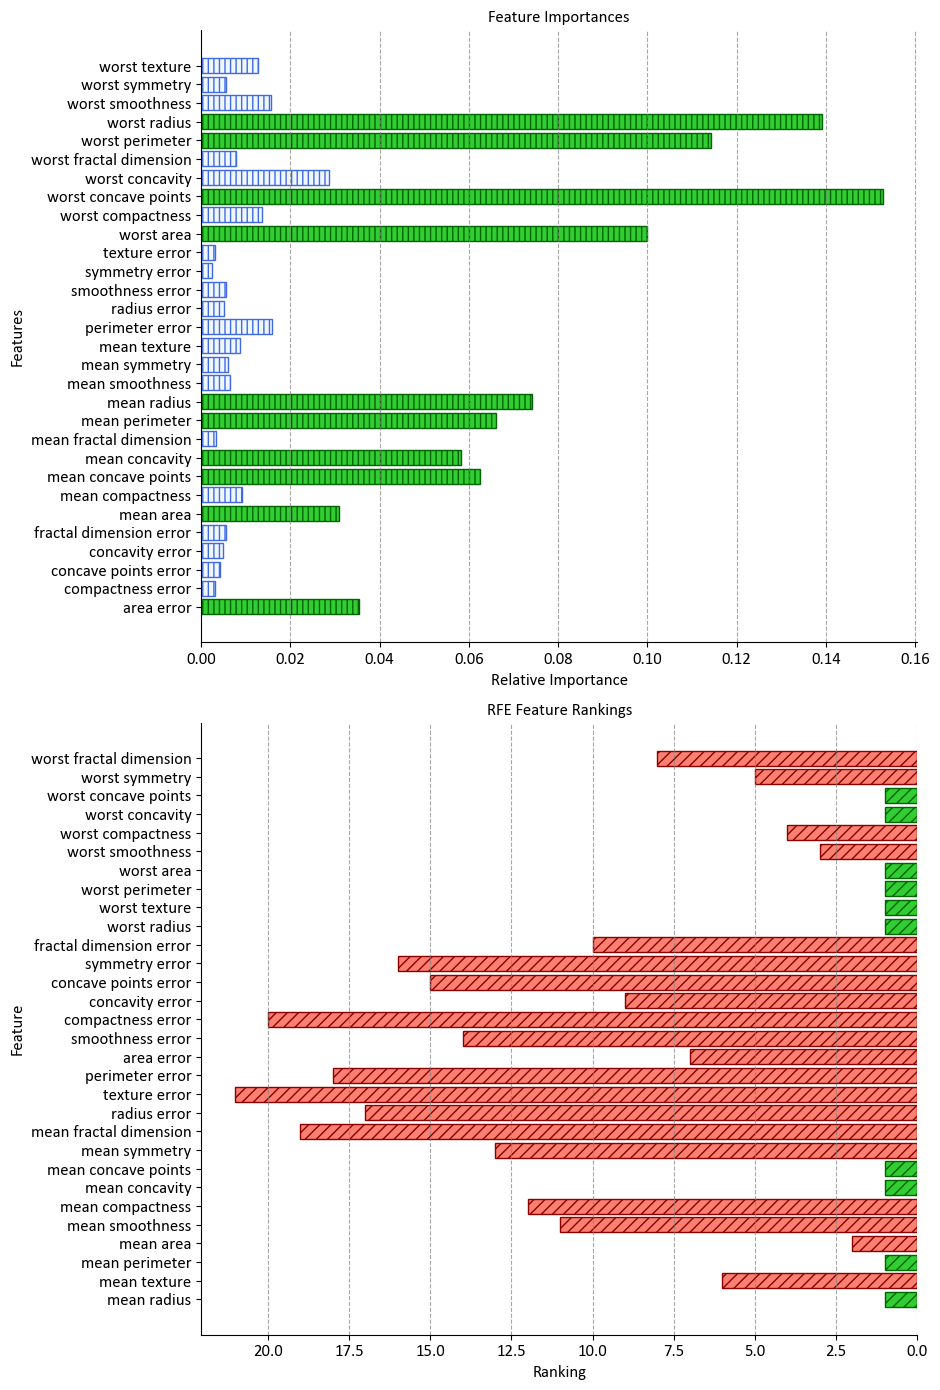

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Create and fit a RandomForestClassifier
clf = RandomForestClassifier().fit(X_train, y_train)
importance_df = pd.DataFrame({'Features': data.feature_names, 'Importance': clf.feature_importances_})
importance_df = importance_df.sort_values(by = 'Features')

n_features_to_select = 10
# Perform RFE
rfe = RFE(estimator=clf, n_features_to_select = n_features_to_select)
_ = rfe.fit(X_train, y_train)

# Get feature rankings
feature_rankings = rfe.ranking_

# Create figure and axes with custom style
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 14))

_most_important = importance_df.sort_values(by = 'Importance',
                                                 ascending = False)[:n_features_to_select]['Features'].tolist()
# Plot feature importances in the first subplot
ax = axes[0]
colors = ['LimeGreen' if feat in _most_important else 'AliceBlue' for feat in importance_df['Features']]
edge_colors = ['DarkGreen' if feat in _most_important else 'RoyalBlue' for feat in importance_df['Features']]

_ = ax.barh(importance_df.Features, importance_df.Importance, align="center",
            color=colors, edgecolor=edge_colors, hatch='|||')
_ = ax.set(title="Feature Importances", xlabel="Relative Importance", ylabel="Features")
_ = ax.spines[['top', 'right']].set_visible(False)
_ = ax.xaxis.tick_bottom()
_ = ax.yaxis.tick_left()
_ = ax.grid(axis='y', which='both', visible=False)
_ = ax.grid(axis='x', linestyle='--', alpha=0.7)

# Plot RFE feature rankings in the second subplot
ax = axes[1]
colors = ['Salmon' if not selected else 'LimeGreen' for selected in rfe.support_]
edge_colors = ['DarkRed' if not selected else 'DarkGreen' for selected in rfe.support_]
_ = ax.barh(data.feature_names, feature_rankings, align="center",
            color=colors, edgecolor=edge_colors, hatch='///')
_ = ax.set(title="RFE Feature Rankings", xlabel="Ranking", ylabel="Feature")
_ = ax.invert_xaxis()
_ = ax.spines[['top', 'right']].set_visible(False)
_ = ax.xaxis.tick_bottom()
_ = ax.yaxis.tick_left()
_ = ax.grid(axis='y', which='both', visible=False)
_ = ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In this example, we first fit a RandomForestClassifier to the training data and calculate the feature importances. We then perform RFE using the same classifier to determine the rankings of the features. The most important features for both scenarios are highlighted using distinctive colors and hatch patterns. The two subplots display the feature importances and RFE rankings, respectively, providing a visual comparison of their significance. This visualization aids in making informed decisions about feature selection and understanding the impact of each feature on the model's performance.

In [5]:
display(pd.DataFrame({'Features':data.feature_names, 'Rank':rfe.ranking_}).set_index('Features').sort_index()\
.style.background_gradient(cmap='PuBu', subset=['Rank']))

,Rank
Features,
area error,7
compactness error,20
concave points error,15
concavity error,9
fractal dimension error,10
mean area,2
mean compactness,12
mean concave points,1
mean concavity,1


## How many Features to select?

Feature selection is a crucial step in machine learning model development. It involves choosing a subset of relevant features from the original set to improve model performance, reduce overfitting, and enhance interpretability. Selecting the right number of features is a balance between complexity and information gain. In this section, we will explore an example of how to determine the optimal number of features to select using Recursive Feature Elimination (RFE) with a RandomForestClassifier.

In [6]:
from sklearn import metrics
    
df = pd.DataFrame()
for n in range(4, X.shape[1]+1):
    selector = RFE(estimator= RandomForestClassifier(), n_features_to_select=n, verbose=0)
    selector.fit(X_train, y_train)
    df_temp = pd.DataFrame({'Number of Features to Select': n,
                            'Total number of features': selector.n_features_in_,
                            'Train F1 Score': metrics.f1_score(y_train, selector.predict(X_train)),
                            'Test F1 Score': metrics.f1_score(y_test, selector.predict(X_test)),
                            'Best Features': [data.feature_names[rfe.support_]]})
    df = pd.concat([df, df_temp], ignore_index = True)
    del df_temp

df = df.sort_values(by = ['Test F1 Score',
                          'Number of Features to Select'], ascending = [False, True]).reset_index(drop = True)
display(df.style.background_gradient(cmap='Greens', subset=['Test F1 Score']))

,Number of Features to Select,Total number of features,Train F1 Score,Test F1 Score,Best Features
0,10,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
1,12,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
2,13,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
3,14,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
4,16,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
5,19,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
6,23,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
7,26,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
8,29,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']
9,30,30,1.000000,0.958525,['mean radius' 'mean perimeter' 'mean concavity' 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter' 'worst area' 'worst concavity' 'worst concave points']


In this example, we use the Recursive Feature Elimination (RFE) technique with a RandomForestClassifier as the estimator. RFE works by recursively fitting the model and removing the least important features until the desired number of features is reached. The evaluation metrics, including the Train F1 Score and Test F1 Score, are recorded for each configuration.

The loop iterates through different numbers of features to select, and for each iteration, it fits the model using RFE and calculates the F1 scores for both the training and test sets. The results are stored in a DataFrame (`df_temp`) and then concatenated with the main DataFrame (`df`).

Finally, the DataFrame is sorted based on the Test F1 Score in descending order, which helps identify the configuration that yields the best performance on the test set. This process aids in determining the optimal number of features to select for achieving the highest model performance.

`````{admonition} Note
:class: warning
Beyond the process of feature selection, there's an additional avenue for enhancing model performance—fine-tuning. Fine-tuning involves the meticulous adjustment of hyperparameters and model configurations to achieve the utmost optimal results. By optimizing hyperparameters, you can achieve a more refined and effective model that's tailored precisely to the dataset and the specific problem at hand. This iterative process of fine-tuning empowers you to squeeze out the last drops of performance, ensuring that your model operates at its highest potential.
`````